In [51]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
# import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression

In [2]:
NUM_SAMPLES_BUFFER = 600
FILTER_AFTER_N = 200
BP_LOW_CUTOFF = 20
BP_HIGH_CUTOFF = 500
ORDER = 2
LP_HIGH_CUTOFF = 5

Mvc = 346.0
percent_mvc = 0.2
mvc_threshold = percent_mvc*Mvc

In [3]:
data1_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-161128")
data2_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-162311")
data3_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-162909")
data4_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-163711")
data6_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-164730")
data7_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-165728")
data8_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-170300")
data9_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-171427")

data5_haptics = np.loadtxt("Dailyn 2/raw_data_20220819-172746")

data_timestamps1_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-161128")
data_timestamps2_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-162311")
data_timestamps3_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-162909")
data_timestamps4_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-163711")
data_timestamps6_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-164730")
data_timestamps7_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-165728")
data_timestamps8_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-170300")
data_timestamps9_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-171427")

data_timestamps5_haptics = np.loadtxt("Dailyn 2/timestamp_data_20220819-172746")

data_crossed1_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-161128")
data_crossed2_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-162311")
data_crossed3_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-162909")
data_crossed4_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-163711")
data_crossed6_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-164730")
data_crossed7_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-165728")
data_crossed8_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-170300")
data_crossed9_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-171427")

data_crossed5_haptics = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-172746")

gui_data1_haptics = np.load("Dailyn 2/combo_info_20220819-161118.npz")
gui_data2_haptics = np.load("Dailyn 2/combo_info_20220819-162307.npz")
gui_data3_haptics = np.load("Dailyn 2/combo_info_20220819-162904.npz")
gui_data4_haptics = np.load("Dailyn 2/combo_info_20220819-163642.npz")
gui_data6_haptics = np.load("Dailyn 2/combo_info_20220819-164724.npz")
gui_data7_haptics = np.load("Dailyn 2/combo_info_20220819-165722.npz")
gui_data8_haptics = np.load("Dailyn 2/combo_info_20220819-170255.npz")
gui_data9_haptics = np.load("Dailyn 2/combo_info_20220819-171423.npz")

gui_data5_haptics = np.load("Dailyn 2/combo_info_20220819-172742.npz")

In [4]:
data1_wo = np.loadtxt("Dailyn 2/raw_data_20220819-161508")
data2_wo = np.loadtxt("Dailyn 2/raw_data_20220819-161954")
data3_wo = np.loadtxt("Dailyn 2/raw_data_20220819-162629")
data4_wo = np.loadtxt("Dailyn 2/raw_data_20220819-163328")
data5_wo = np.loadtxt("Dailyn 2/raw_data_20220819-164109")
data6_wo = np.loadtxt("Dailyn 2/raw_data_20220819-165012")
data7_wo = np.loadtxt("Dailyn 2/raw_data_20220819-170008")
data9_wo = np.loadtxt("Dailyn 2/raw_data_20220819-171029")
data8_wo = np.loadtxt("Dailyn 2/raw_data_20220819-172500")

data_timestamps1_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-161508")
data_timestamps2_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-161954")
data_timestamps3_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-162629")
data_timestamps4_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-163328")
data_timestamps5_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-164109")
data_timestamps6_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-165012")
data_timestamps7_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-170008")
data_timestamps9_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-171029")
data_timestamps8_wo = np.loadtxt("Dailyn 2/timestamp_data_20220819-172500")

data_crossed1_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-161508")
data_crossed2_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-161954")
data_crossed3_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-162629")
data_crossed4_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-163328")
data_crossed5_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-164109")
data_crossed6_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-165012")
data_crossed7_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-170008")
data_crossed9_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-171029")
data_crossed8_wo = np.loadtxt("Dailyn 2/timestamp_crossed_data_20220819-172500")

gui_data1_wo = np.load("Dailyn 2/combo_info_20220819-161504.npz")
gui_data2_wo = np.load("Dailyn 2/combo_info_20220819-161950.npz")
gui_data3_wo = np.load("Dailyn 2/combo_info_20220819-162626.npz")
gui_data4_wo = np.load("Dailyn 2/combo_info_20220819-163320.npz")
gui_data5_wo = np.load("Dailyn 2/combo_info_20220819-164102.npz")
gui_data6_wo = np.load("Dailyn 2/combo_info_20220819-165007.npz")
gui_data7_wo = np.load("Dailyn 2/combo_info_20220819-170002.npz")
gui_data9_wo = np.load("Dailyn 2/combo_info_20220819-171022.npz")
gui_data8_wo = np.load("Dailyn 2/combo_info_20220819-172456.npz")

In [5]:
gui_combos_haptics = np.concatenate((gui_data1_haptics['combos'], gui_data2_haptics['combos'], gui_data3_haptics['combos'], gui_data4_haptics['combos'], gui_data5_haptics['combos'], gui_data6_haptics['combos'], gui_data7_haptics['combos'], gui_data8_haptics['combos'], gui_data9_haptics['combos']), axis=0)
gui_reps_haptics = gui_data1_haptics['reps']

print("repitions:", gui_reps_haptics)
print('Wt/Dt combos:', gui_combos_haptics)

ID_haptics = np.log2(gui_combos_haptics[:,1]/gui_combos_haptics[:,0])
print("ID:",ID_haptics)

repitions: 25
Wt/Dt combos: [[ 230 1000]
 [ 230 2200]
 [ 230 1600]
 [ 150 1600]
 [ 150 1000]
 [ 150 2200]
 [  60 1000]
 [  60 1600]
 [  60 2200]
 [ 230 2200]
 [ 230 1600]
 [ 230 1000]
 [  60 2200]
 [  60 1000]
 [  60 1600]
 [ 150 2200]
 [ 150 1000]
 [ 150 1600]
 [ 230 2200]
 [ 230 1600]
 [ 230 1000]
 [  60 1000]
 [  60 1600]
 [  60 2200]
 [ 150 1600]
 [ 150 2200]
 [ 150 1000]]
ID: [2.12029423 3.25779776 2.79836614 3.4150375  2.73696559 3.87446912
 4.05889369 4.73696559 5.19639721 3.25779776 2.79836614 2.12029423
 5.19639721 4.05889369 4.73696559 3.87446912 2.73696559 3.4150375
 3.25779776 2.79836614 2.12029423 4.05889369 4.73696559 5.19639721
 3.4150375  3.87446912 2.73696559]


In [6]:
gui_combos_wo = np.concatenate((gui_data1_wo['combos'], gui_data2_wo['combos'], gui_data3_wo['combos'],gui_data4_wo['combos'], gui_data5_wo['combos'], gui_data6_wo['combos'],gui_data7_wo['combos'], gui_data8_wo['combos'], gui_data9_wo['combos']), axis=0)
gui_reps_wo = gui_data1_wo['reps']

print("repitions:", gui_reps_wo)
print('Wt/Dt combos:', gui_combos_wo)

ID_wo = np.log2(gui_combos_wo[:,1]/gui_combos_wo[:,0])
print("ID:",ID_wo)

repitions: 25
Wt/Dt combos: [[ 230 2200]
 [ 230 1600]
 [ 230 1000]
 [ 150 1600]
 [ 150 2200]
 [ 150 1000]
 [  60 1000]
 [  60 2200]
 [  60 1600]
 [ 230 1600]
 [ 230 1000]
 [ 230 2200]
 [  60 1000]
 [  60 2200]
 [  60 1600]
 [ 150 1600]
 [ 150 1000]
 [ 150 2200]
 [ 230 2200]
 [ 230 1600]
 [ 230 1000]
 [  60 2200]
 [  60 1600]
 [  60 1000]
 [ 150 1600]
 [ 150 1000]
 [ 150 2200]]
ID: [3.25779776 2.79836614 2.12029423 3.4150375  3.87446912 2.73696559
 4.05889369 5.19639721 4.73696559 2.79836614 2.12029423 3.25779776
 4.05889369 5.19639721 4.73696559 3.4150375  2.73696559 3.87446912
 3.25779776 2.79836614 2.12029423 5.19639721 4.73696559 4.05889369
 3.4150375  2.73696559 3.87446912]


In [7]:
def remove_trailing_zeros(data, data_timestamps, data_crossed):
    data_new = data[~(data == 0).all(axis=1)]
    timestamp_data_new = data_timestamps[~(data == 0).all(axis=1)]
    data_crossed_new = data_crossed[~(data_crossed == 0)]
    return data_new, timestamp_data_new, data_crossed_new

def zero_runs(a):
    if a[-1] == 0:
        a = np.append(a, 1)
    if a[0] == 0:
        a = np.append(1, a)
    iszero = np.equal(a, 0).view(np.int8)
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

def remove_long_runs(runs, data):
    runs_lengths = runs[:,1] - runs[:,0]

    for idx, length in enumerate(runs_lengths):
        if length > 2000:
            data[runs[idx,0]-1:runs[idx,1]+1] = 1 

    return data 

In [8]:
data1_haptics, data_timestamps1_haptics, data_crossed1_haptics  = remove_trailing_zeros(data1_haptics, data_timestamps1_haptics, data_crossed1_haptics)
data2_haptics, data_timestamps2_haptics, data_crossed2_haptics  = remove_trailing_zeros(data2_haptics, data_timestamps2_haptics, data_crossed2_haptics)
data3_haptics, data_timestamps3_haptics, data_crossed3_haptics  = remove_trailing_zeros(data3_haptics, data_timestamps3_haptics, data_crossed3_haptics)
data4_haptics, data_timestamps4_haptics, data_crossed4_haptics  = remove_trailing_zeros(data4_haptics, data_timestamps4_haptics, data_crossed4_haptics)
data5_haptics, data_timestamps5_haptics, data_crossed5_haptics  = remove_trailing_zeros(data5_haptics, data_timestamps5_haptics, data_crossed5_haptics)
data6_haptics, data_timestamps6_haptics, data_crossed6_haptics  = remove_trailing_zeros(data6_haptics, data_timestamps6_haptics, data_crossed6_haptics)
data7_haptics, data_timestamps7_haptics, data_crossed7_haptics  = remove_trailing_zeros(data7_haptics, data_timestamps7_haptics, data_crossed7_haptics)
data8_haptics, data_timestamps8_haptics, data_crossed8_haptics  = remove_trailing_zeros(data8_haptics, data_timestamps8_haptics, data_crossed8_haptics)
data9_haptics, data_timestamps9_haptics, data_crossed9_haptics  = remove_trailing_zeros(data9_haptics, data_timestamps9_haptics, data_crossed9_haptics)

data_timestamps2_haptics = data_timestamps2_haptics[:-2]
data2_haptics = data2_haptics[:-2]

data_timestamps5_haptics = data_timestamps5_haptics[:523799]
data5_haptics = data5_haptics[:523799]

data_timestamps9_haptics = data_timestamps9_haptics[:535200]
data9_haptics = data9_haptics[:535200]

data_crossed1_haptics = data_crossed1_haptics - data_timestamps1_haptics[0]
data_timestamps1_haptics = data_timestamps1_haptics - data_timestamps1_haptics[0]

data_crossed2_haptics = data_crossed2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]
data_timestamps2_haptics = data_timestamps2_haptics - data_timestamps2_haptics[0] + data_timestamps1_haptics[-1]


data_crossed3_haptics = data_crossed3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]
data_timestamps3_haptics = data_timestamps3_haptics - data_timestamps3_haptics[0] + data_timestamps2_haptics[-1]

data_crossed4_haptics = data_crossed4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]
data_timestamps4_haptics = data_timestamps4_haptics - data_timestamps4_haptics[0] + data_timestamps3_haptics[-1]

data_crossed5_haptics = data_crossed5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]
data_timestamps5_haptics = data_timestamps5_haptics - data_timestamps5_haptics[0] + data_timestamps4_haptics[-1]

data_crossed6_haptics = data_crossed6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]
data_timestamps6_haptics = data_timestamps6_haptics - data_timestamps6_haptics[0] + data_timestamps5_haptics[-1]

data_crossed7_haptics = data_crossed7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]
data_timestamps7_haptics = data_timestamps7_haptics - data_timestamps7_haptics[0] + data_timestamps6_haptics[-1]

data_crossed8_haptics = data_crossed8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]
data_timestamps8_haptics = data_timestamps8_haptics - data_timestamps8_haptics[0] + data_timestamps7_haptics[-1]

data_crossed9_haptics = data_crossed9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]
data_timestamps9_haptics = data_timestamps9_haptics - data_timestamps9_haptics[0] + data_timestamps8_haptics[-1]



data1_haptics[:, 4] = remove_long_runs(zero_runs(data1_haptics[:, 4]), data1_haptics[:, 4])
data2_haptics[:, 4] = remove_long_runs(zero_runs(data2_haptics[:, 4]), data2_haptics[:, 4])
data3_haptics[:, 4] = remove_long_runs(zero_runs(data3_haptics[:, 4]), data3_haptics[:, 4])
data4_haptics[:, 4] = remove_long_runs(zero_runs(data4_haptics[:, 4]), data4_haptics[:, 4])
data5_haptics[:, 4] = remove_long_runs(zero_runs(data5_haptics[:, 4]), data5_haptics[:, 4])
data6_haptics[:, 4] = remove_long_runs(zero_runs(data6_haptics[:, 4]), data6_haptics[:, 4])
data7_haptics[:, 4] = remove_long_runs(zero_runs(data7_haptics[:, 4]), data7_haptics[:, 4])
data8_haptics[:, 4] = remove_long_runs(zero_runs(data8_haptics[:, 4]), data8_haptics[:, 4])
data9_haptics[:, 4] = remove_long_runs(zero_runs(data9_haptics[:, 4]), data9_haptics[:, 4])

data_crossed_haptics = np.concatenate((data_crossed1_haptics, data_crossed2_haptics, data_crossed3_haptics,data_crossed4_haptics, data_crossed5_haptics, data_crossed6_haptics,data_crossed7_haptics, data_crossed8_haptics, data_crossed9_haptics), axis = 0)
data_timestamps_haptics = np.concatenate((data_timestamps1_haptics, data_timestamps2_haptics, data_timestamps3_haptics,data_timestamps4_haptics, data_timestamps5_haptics, data_timestamps6_haptics, data_timestamps7_haptics, data_timestamps8_haptics, data_timestamps9_haptics), axis=0)
data_haptics = np.concatenate((data1_haptics, data2_haptics, data3_haptics, data4_haptics, data5_haptics, data6_haptics, data7_haptics, data8_haptics, data9_haptics), axis=0)

In [9]:
data1_wo, data_timestamps1_wo, data_crossed1_wo  = remove_trailing_zeros(data1_wo, data_timestamps1_wo, data_crossed1_wo)
data2_wo, data_timestamps2_wo, data_crossed2_wo  = remove_trailing_zeros(data2_wo, data_timestamps2_wo, data_crossed2_wo)
data3_wo, data_timestamps3_wo, data_crossed3_wo  = remove_trailing_zeros(data3_wo, data_timestamps3_wo, data_crossed3_wo)
data4_wo, data_timestamps4_wo, data_crossed4_wo  = remove_trailing_zeros(data4_wo, data_timestamps4_wo, data_crossed4_wo)
data5_wo, data_timestamps5_wo, data_crossed5_wo  = remove_trailing_zeros(data5_wo, data_timestamps5_wo, data_crossed5_wo)
data6_wo, data_timestamps6_wo, data_crossed6_wo  = remove_trailing_zeros(data6_wo, data_timestamps6_wo, data_crossed6_wo)
data7_wo, data_timestamps7_wo, data_crossed7_wo  = remove_trailing_zeros(data7_wo, data_timestamps7_wo, data_crossed7_wo)
data8_wo, data_timestamps8_wo, data_crossed8_wo  = remove_trailing_zeros(data8_wo, data_timestamps8_wo, data_crossed8_wo)
data9_wo, data_timestamps9_wo, data_crossed9_wo  = remove_trailing_zeros(data9_wo, data_timestamps9_wo, data_crossed9_wo)


data_crossed1_wo = data_crossed1_wo - data_timestamps1_wo[0]
data_timestamps1_wo = data_timestamps1_wo - data_timestamps1_wo[0]

data_crossed2_wo = data_crossed2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]
data_timestamps2_wo = data_timestamps2_wo - data_timestamps2_wo[0] + data_timestamps1_wo[-1]

data_crossed3_wo = data_crossed3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]
data_timestamps3_wo = data_timestamps3_wo - data_timestamps3_wo[0] + data_timestamps2_wo[-1]

data_crossed4_wo = data_crossed4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]
data_timestamps4_wo = data_timestamps4_wo - data_timestamps4_wo[0] + data_timestamps3_wo[-1]

data_crossed5_wo = data_crossed5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]
data_timestamps5_wo = data_timestamps5_wo - data_timestamps5_wo[0] + data_timestamps4_wo[-1]

data_crossed6_wo = data_crossed6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]
data_timestamps6_wo = data_timestamps6_wo - data_timestamps6_wo[0] + data_timestamps5_wo[-1]

data_crossed7_wo = data_crossed7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]
data_timestamps7_wo = data_timestamps7_wo - data_timestamps7_wo[0] + data_timestamps6_wo[-1]

data_crossed8_wo = data_crossed8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]
data_timestamps8_wo = data_timestamps8_wo - data_timestamps8_wo[0] + data_timestamps7_wo[-1]

data_crossed9_wo = data_crossed9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]
data_timestamps9_wo = data_timestamps9_wo - data_timestamps9_wo[0] + data_timestamps8_wo[-1]

data1_wo[:, 4] = remove_long_runs(zero_runs(data1_wo[:, 4]), data1_wo[:, 4])
data2_wo[:, 4] = remove_long_runs(zero_runs(data2_wo[:, 4]), data2_wo[:, 4])
data3_wo[:, 4] = remove_long_runs(zero_runs(data3_wo[:, 4]), data3_wo[:, 4])
data4_wo[:, 4] = remove_long_runs(zero_runs(data4_wo[:, 4]), data4_wo[:, 4])
data5_wo[:, 4] = remove_long_runs(zero_runs(data5_wo[:, 4]), data5_wo[:, 4])
data6_wo[:, 4] = remove_long_runs(zero_runs(data6_wo[:, 4]), data6_wo[:, 4])
data7_wo[:, 4] = remove_long_runs(zero_runs(data7_wo[:, 4]), data7_wo[:, 4])
data8_wo[:, 4] = remove_long_runs(zero_runs(data8_wo[:, 4]), data8_wo[:, 4])
data9_wo[:, 4] = remove_long_runs(zero_runs(data9_wo[:, 4]), data9_wo[:, 4])

data_crossed_wo = np.concatenate((data_crossed1_wo, data_crossed2_wo, data_crossed3_wo, data_crossed4_wo, data_crossed5_wo, data_crossed6_wo, data_crossed7_wo, data_crossed8_wo, data_crossed9_wo), axis = 0)
data_timestamps_wo = np.concatenate((data_timestamps1_wo, data_timestamps2_wo, data_timestamps3_wo, data_timestamps4_wo, data_timestamps5_wo, data_timestamps6_wo, data_timestamps7_wo, data_timestamps8_wo, data_timestamps9_wo), axis=0)
data_wo = np.concatenate((data1_wo, data2_wo, data3_wo, data4_wo, data5_wo, data6_wo, data7_wo, data8_wo, data9_wo), axis=0)

In [10]:
data_timestamps2_wo

array([129.30520849, 129.30545849, 129.30570849, ..., 259.36947969,
       259.36972969, 259.36997969])

In [11]:
data_timestamps9_haptics

array([1077.87534726, 1077.87559726, 1077.87584726, ..., 1211.67735326,
       1211.67760326, 1211.67785326])

In [12]:
np.argwhere(data_timestamps9_haptics < -860000)

array([], shape=(0, 1), dtype=int64)

Text(0.5, 1.0, 'EMG - Haptics ')

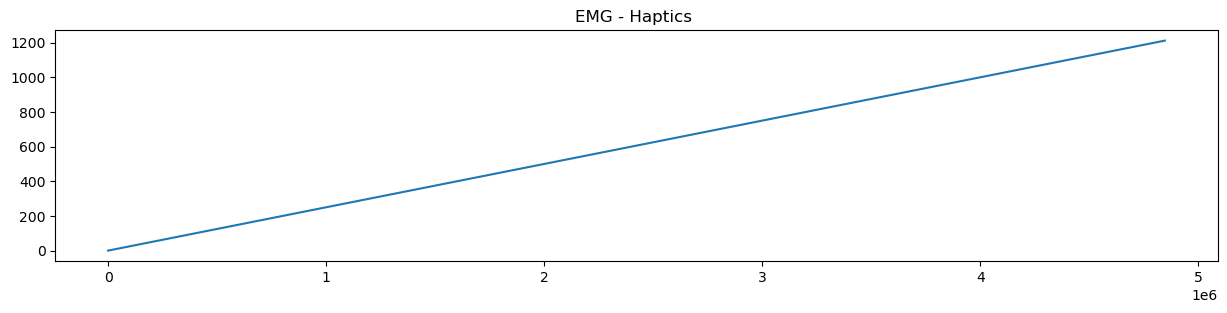

In [13]:

fig, axs = plt.subplots(1, figsize=(15, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_haptics)

plt.title('EMG - Haptics ')

Text(0.5, 1.0, 'EMG - Haptics ')

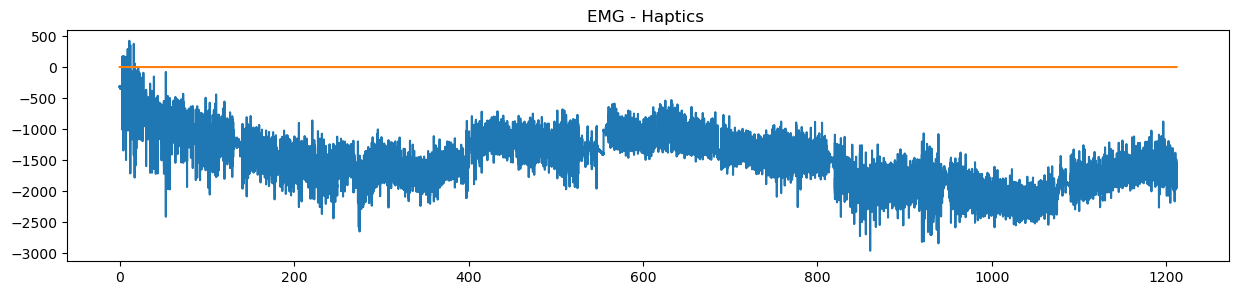

In [14]:

fig, axs = plt.subplots(1, figsize=(15, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_haptics, data_haptics[:, 0])
plt.plot(data_timestamps_haptics, data_haptics[:, 4])
plt.title('EMG - Haptics ')

Text(0.5, 1.0, 'EMG - None')

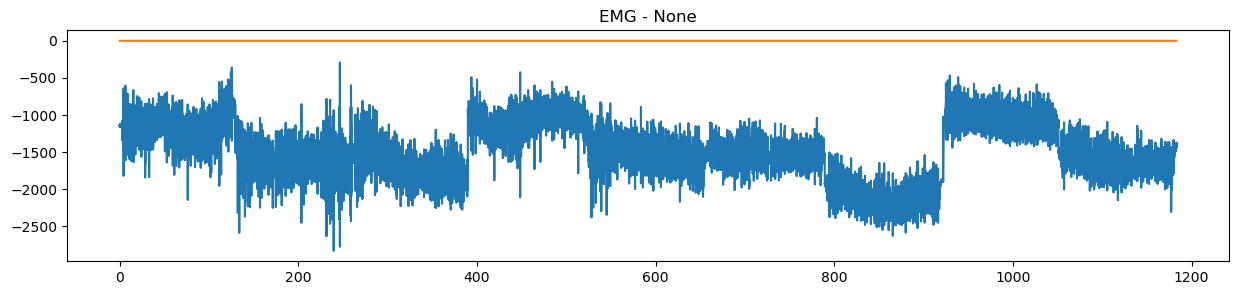

In [15]:
fig, axs = plt.subplots(1, figsize=(15, 3), sharex=True) # dont need status or lsl clock
# fig.suptitle('Data Flow')

plt.plot(data_timestamps_wo, data_wo[:, 0])
plt.plot(data_timestamps_wo, data_wo[:, 4])
plt.title('EMG - None')

In [16]:
process_haptics = data_processing.postProcessData(4000, data_haptics[:,0])
process_haptics.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

process_wo = data_processing.postProcessData(4000, data_wo[:,0])
process_wo.processAll(BP_LOW_CUTOFF, BP_HIGH_CUTOFF, LP_HIGH_CUTOFF, ORDER, FILTER_AFTER_N)

In [17]:
def findThresholdCrossing(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold, prepend=False)
    positive_difference = np.diff(lpData, prepend=0) >= 0 
    threshold_crossings_positive = np.argwhere(np.logical_and(threshold_crossings, positive_difference))[:,0]
    return threshold_crossings_positive

def thresholdCrossed(lpData, threshold):
    threshold_crossings = np.diff(lpData > threshold)
    print("function crossing", threshold_crossings)
    positive_difference = np.diff(lpData) > 0    
    print("funciton difference", positive_difference) 
    thresholdCrossed =  np.any(np.logical_and(threshold_crossings, positive_difference))
    return thresholdCrossed

In [18]:


threshold_crossings_up_haptics = findThresholdCrossing(process_haptics.lpFilteredData, mvc_threshold)
threshold_crossings_up_wo = findThresholdCrossing(process_wo.lpFilteredData, mvc_threshold)

# Haptics 
stop_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == 1)[0])
start_cue_haptics = (np.where(np.diff(data_haptics[:, 4]) == -1)[0])

if stop_cue_haptics[0] < start_cue_haptics[0]:
    stop_cue_haptics = stop_cue_haptics[1:]

# NOne
stop_cue_wo = (np.where(np.diff(data_wo[:, 4]) == 1)[0])
start_cue_wo = (np.where(np.diff(data_wo[:, 4]) == -1)[0])

if stop_cue_wo[0] < start_cue_wo[0]:
    stop_cue_wo = stop_cue_wo[1:]

print("threshold corssing:", threshold_crossings_up_haptics)
print("start:", start_cue_haptics)
print("stop:", stop_cue_haptics)

threshold corssing: [  12518   16582   20481   24475   28719   32510   36325   40269   43965
   48277   52399   56335   60465   64149   67969   72152   76242   80627
   84795   88564   92693   96581  100675  104235  108253  120877  130176
  139206  147903  156693  165059  173787  182866  191623  202728  211295
  220166  229395  238134  246682  255158  264523  273037  281891  290911
  299797  308572  326058  334597  348600  354736  361769  368094  374754
  380722  386984  393626  400130  406668  412705  419006  425861  431786
  438757  441817  448241  454346  460923  467263  473477  479920  486586
  493537  498976  506180  515959  562589  568947  575359  581977  588300
  594378  600364  606920  613756  620182  626788  632724  639260  645522
  652193  658500  664929  671241  677436  684401  690634  697156  703626
  709948  716342  737229  741422  745190  749124  753289  757324  761252
  765284  769413  773230  777409  781367  785404  789382  793493  797472
  801433  805599  809629  81332

In [19]:
stop_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == 1)[0]]
# print(stop_cue_timestamp_haptics)

start_cue_timestamp_haptics = data_timestamps_haptics[np.where(np.diff(data_haptics[:, 4]) == -1)[0]]
# print(start_cue_timestamp_haptics)

data_crossed_small_haptics = data_crossed_haptics[data_crossed_haptics<np.max(data_timestamps_haptics)]
data_crossed_small_haptics = data_crossed_small_haptics[data_crossed_small_haptics>0]
# print(data_crossed_small_haptics)


stop_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == 1)[0]]
# print(stop_cue_timestampwo)

start_cue_timestamp_wo = data_timestamps_wo[np.where(np.diff(data_wo[:, 4]) == -1)[0]]
# print(start_cue_timestampwo)

data_crossed_small_wo = data_crossed_wo[data_crossed_wo<np.max(data_timestamps_wo)]
data_crossed_small_wo = data_crossed_small_wo[data_crossed_small_wo>0]

In [20]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper right') #,bbox_to_anchor=(0.96,1)

def set_normalized_twin_axis(axis, mvc):
    ax_twin = axis.twinx()
    ax_twin.set_ylabel('Normalized')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/mvc
    # get left axis limits
    ymin, ymax = axis.get_ylim()
    # apply function and set transformed values to right axis limits
    ax_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events

    axis.spines['top'].set_visible(False)
    ax_twin.spines['top'].set_visible(False)
    ax_twin.plot([],[])

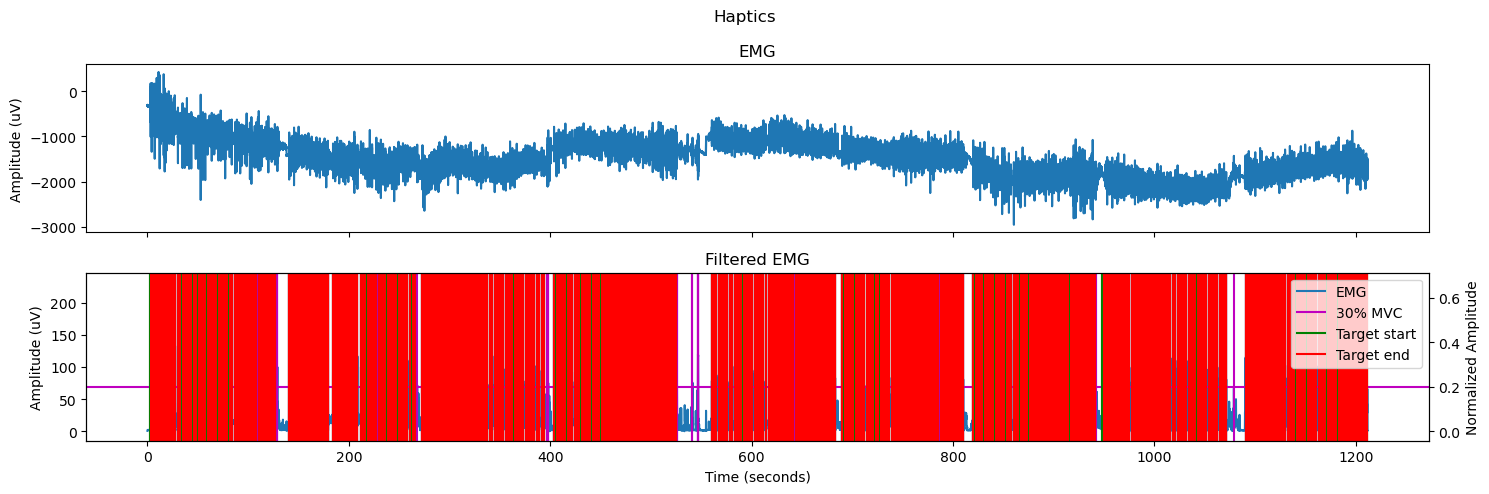

In [21]:
fig, axs = plt.subplots(2, figsize=(15, 5), sharex=True) # dont need status or lsl clock
fig.suptitle('Haptics')

axs[0].plot(data_timestamps_haptics, data_haptics[:, 0])
axs[0].title.set_text('EMG')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r')

axs[1].plot(data_timestamps_haptics, process_haptics.lpFilteredData, label='EMG')
axs[1].title.set_text('Filtered EMG')
axs[1].axhline(y=mvc_threshold, color='m', label='30% MVC')

for ups in data_crossed_small_haptics:
    axs[1].axvline(x=ups, color='m')

for xc in start_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='g', label='Target start')
for xc in stop_cue_timestamp_haptics:
    axs[1].axvline(x=xc, color='r', label='Target end')

    
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Amplitude (uV)')
axs[0].set_ylabel('Amplitude (uV)')
ax1_twin = axs[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = axs[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

# plt.legend(loc="upper right", ncol=2)
legend_without_duplicate_labels(axs[1])

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()

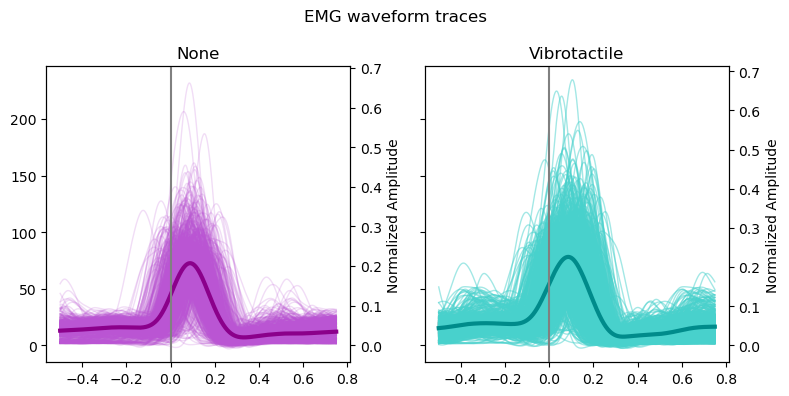

In [22]:
x_axis = (np.arange(5000) - 2000)/4000


fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
waveforms_wo = np.empty((np.shape(start_cue_wo)[0], 5000))
for idx, start in enumerate(start_cue_wo):
    waveforms_wo[idx] = process_wo.lpFilteredData[start-2000:start+3000]
    ax[0].plot(x_axis, process_wo.lpFilteredData[start-2000:start+3000], alpha=0.2, lw=1, color='mediumorchid')

# print(np.shape(np.mean(waveforms, axis=0)))
ax[0].set_title('None')
ax[0].plot(x_axis, np.mean(waveforms_wo, axis=0), color ='darkmagenta', lw=3)
ax1_twin = ax[0].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')


# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax[0].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

plt.axvline(x = 0, color='grey')



waveforms_haptics = np.empty((np.shape(start_cue_haptics)[0], 5000))
for idx, start in enumerate(start_cue_haptics):
    waveforms_haptics[idx] = process_haptics.lpFilteredData[start-2000:start+3000]
    ax[1].plot(x_axis, process_haptics.lpFilteredData[start-2000:start+3000], alpha=0.5, lw=1, color='mediumturquoise')

# print(np.shape(np.mean(waveforms, axis=0)))
ax[1].plot(x_axis, np.mean(waveforms_haptics, axis=0), color ='darkcyan', lw=3)
ax[1].set_title('Vibrotactile')
ax1_twin = ax[1].twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax[1].get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])

plt.axvline(x = 0, color='grey')
plt.suptitle('EMG waveform traces')
plt.tight_layout()

In [23]:
np.shape(start_cue_haptics)

(674,)

Text(0.5, 1.0, 'Average (+std dev) EMG waveforms')

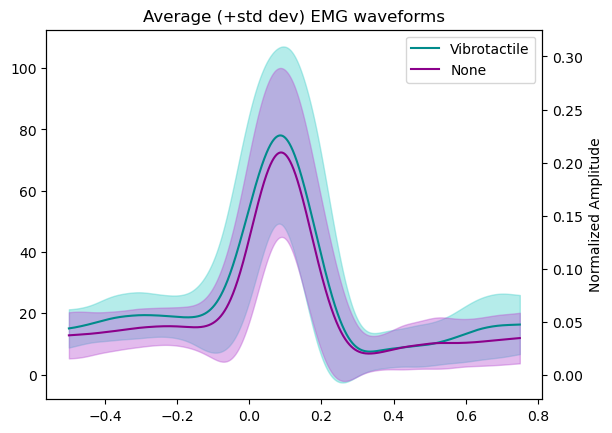

In [24]:
fig, ax = plt.subplots(1)
plt.plot(x_axis, np.mean(waveforms_haptics, axis=0), 'darkcyan', label='Vibrotactile')
plt.fill_between(x_axis, np.mean(waveforms_haptics, axis=0)-np.std(waveforms_haptics, axis=0), np.mean(waveforms_haptics, axis=0)+np.std(waveforms_haptics, axis=0), color='mediumturquoise', alpha=0.4)
plt.plot(x_axis, np.mean(waveforms_wo, axis=0), 'darkmagenta', label='None')
plt.fill_between(x_axis, np.mean(waveforms_wo, axis=0)-np.std(waveforms_wo, axis=0), np.mean(waveforms_wo, axis=0)+np.std(waveforms_wo, axis=0), color='mediumorchid', alpha=0.4)
plt.legend()

ax1_twin = ax.twinx()
ax1_twin.set_ylabel('Normalized Amplitude')

# set twin scale (convert degree celsius to fahrenheit)
Norm_amp = lambda amp: amp/Mvc
# get left axis limits
ymin, ymax = ax.get_ylim()
# apply function and set transformed values to right axis limits
ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
# set an invisible artist to twin axes 
# to prevent falling back to initial values on rescale events
ax1_twin.plot([],[])
plt.title('Average (+std dev) EMG waveforms')

In [25]:
ID_haptics

array([2.12029423, 3.25779776, 2.79836614, 3.4150375 , 2.73696559,
       3.87446912, 4.05889369, 4.73696559, 5.19639721, 3.25779776,
       2.79836614, 2.12029423, 5.19639721, 4.05889369, 4.73696559,
       3.87446912, 2.73696559, 3.4150375 , 3.25779776, 2.79836614,
       2.12029423, 4.05889369, 4.73696559, 5.19639721, 3.4150375 ,
       3.87446912, 2.73696559])

In [26]:
the_ID = ID_haptics[1]
np.argwhere(the_ID == ID_haptics)[2][0]

18

In [27]:
ID_ordered = np.sort(ID_haptics)
ID_ordered[::3]

array([2.12029423, 2.73696559, 2.79836614, 3.25779776, 3.4150375 ,
       3.87446912, 4.05889369, 4.73696559, 5.19639721])

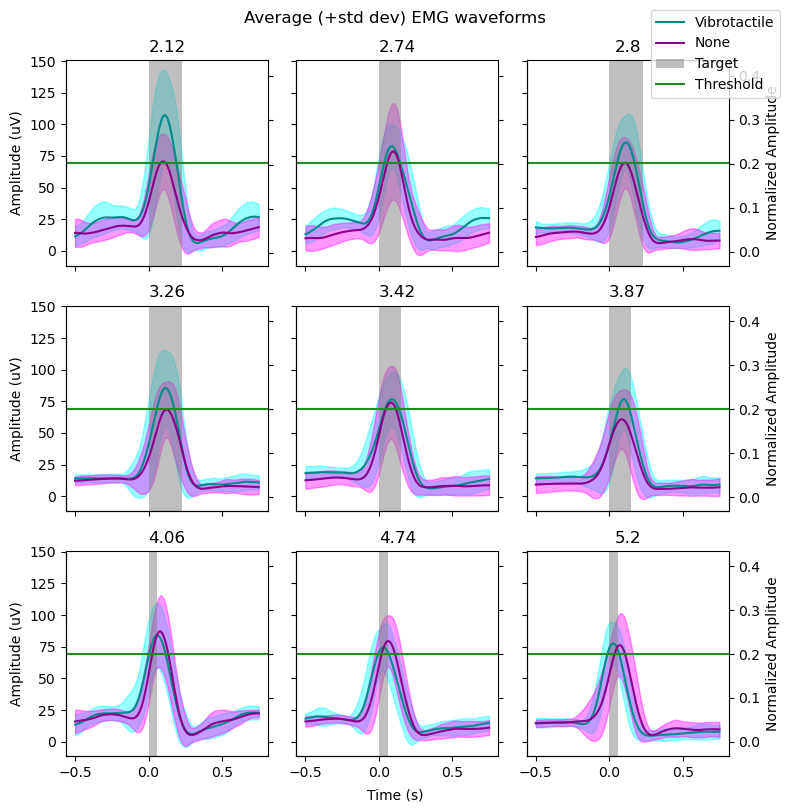

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):

    idx_haptics = np.argwhere(the_ID == ID_haptics)
    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    
    similar_waveforms = np.concatenate((waveforms_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics-1], waveforms_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics-1])) 
    waveform_haptics_mean = np.mean(similar_waveforms, axis=0)
    waveform_haptics_std = np.std(similar_waveforms, axis=0)
    ax[idx].plot(x_axis, waveform_haptics_mean, 'darkcyan', label='Vibrotactile')
    ax[idx].fill_between(x_axis, waveform_haptics_mean-waveform_haptics_std,waveform_haptics_mean+waveform_haptics_std, color='cyan', alpha=0.4)

    idx_wo = np.argwhere(the_ID == ID_wo)
    # print(idx_wo)
    # print(idx_wo*gui_reps_haptics)
    # print((idx_wo+1)*gui_reps_haptics-1)
    similar_waveforms_wo = np.concatenate((waveforms_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics-1], waveforms_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics-1]))
    waveform_wo_mean = np.mean(similar_waveforms_wo, axis=0)
    waveform_wo_std = np.std(similar_waveforms_wo, axis=0)
    ax[idx].plot(x_axis, waveform_wo_mean, 'darkmagenta', label='None')
    ax[idx].fill_between(x_axis, waveform_wo_mean-waveform_wo_std, waveform_wo_mean+waveform_wo_std, color='magenta', alpha=0.4)

    # ax[idx].legend()
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    
    
    ax1_twin = ax[idx].twinx()
    ax1_twin.tick_params(labelright = False)  
    if idx % 3 == 2:
        ax1_twin.set_ylabel('Normalized Amplitude')
        ax1_twin.tick_params(labelright = True)

    if idx % 3 == 0:  
        ax[idx].set_ylabel('Amplitude (uV)')

    # set twin scale (convert degree celsius to fahrenheit)
    Norm_amp = lambda amp: amp/Mvc
    # get left axis limits
    ymin, ymax = ax[idx].get_ylim()
    # apply function and set transformed values to right axis limits
    ax1_twin.set_ylim((Norm_amp(ymin),Norm_amp(ymax)))
    # set an invisible artist to twin axes 
    # to prevent falling back to initial values on rescale events
    ax1_twin.plot([],[])
    plt.title(round(the_ID, 2))
    # plt.axvline(x = 0, color='grey')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axhline(y=mvc_threshold, color='forestgreen',label='Threshold')


handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Average (+std dev) EMG waveforms')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

# plt.savefig('waveforms_ID.png', dpi=500, bbox_inches="tight")
plt.show()

In [49]:
# Exclude the first pulse - that is ardunio power cycling
# start_cue_timestamp = start_cue_timestamp[1:] # [1:]
# stop_cue_timestamp = stop_cue_timestamp[1:] #[1:]

threshold_closest_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
threshold_closest_timestamp_haptics[:] = np.nan
correct_timestamp_haptics = np.empty(np.size(start_cue_timestamp_haptics[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_haptics[:]):

    after_start_timestamp = start_cue_timestamp_haptics[idx_cue] <= data_crossed_small_haptics
    before_stop_timestamp = data_crossed_small_haptics <= stop_cue_timestamp_haptics[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[in_target[0]]
        correct_timestamp_haptics[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_haptics - start_cue_timestamp_haptics[idx_cue])).argmin()

        threshold_closest_timestamp_haptics[idx_cue] = data_crossed_small_haptics[idx]
        correct_timestamp_haptics[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp)

threshold_distance_timestamp_haptics = threshold_closest_timestamp_haptics - start_cue_timestamp_haptics
np.savetxt('dailyn__threshold_distance_timestamp_haptics.txt', threshold_distance_timestamp_haptics)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics > 0.5] = NaN
threshold_distance_timestamp_haptics[threshold_distance_timestamp_haptics < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_haptics)

threshold_distance_timestamp_haptics_nan = threshold_distance_timestamp_haptics[~np.isnan(threshold_distance_timestamp_haptics)]

distance away: [ 7.57499948e-02  9.07499937e-02  7.12312035e-02  4.83918043e-02
  1.35503299e-01  7.18767033e-02  1.72499988e-02  2.99999979e-03
 -3.67499975e-02  1.17499992e-02  6.37499956e-02  2.99999979e-02
  5.44999962e-02 -1.09999992e-02 -5.02499965e-02 -2.32499984e-02
  2.89220654e-03  9.26904992e-02  1.43063798e-01  8.40347020e-02
  1.02991900e-01  9.58151016e-02  1.05918899e-01  1.27570076e-02
  4.49999969e-03 -4.73034044e-02  9.96150016e-02  1.38215898e-01
  1.19784599e-01  1.16417300e-01  3.24999978e-03  3.74999974e-03
  5.74999960e-02  4.29484053e-02  1.98525059e-02 -2.39999983e-02
 -2.49999983e-04  7.32675010e-02  7.92342029e-02  1.27499991e-02
 -4.92499966e-02  7.27499950e-02 -9.24999936e-03  2.92499980e-02
  5.89999959e-02  7.67622022e-02  8.17499944e-02  1.49821298e-01
  5.53821029e-02  2.27377068e-02  5.99999959e-03  4.92499966e-02
  8.89297018e-02  6.09999958e-02  1.40592498e-01  1.82499987e-02
  0.00000000e+00  5.42644045e-02  1.06717501e-01  1.05284701e-01
  1.399999

In [48]:
threshold_closest_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
threshold_closest_timestamp_wo[:] = np.nan
correct_timestamp_wo = np.empty(np.size(start_cue_timestamp_wo[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_timestamp_wo[:]):

    after_start_timestamp = start_cue_timestamp_wo[idx_cue] <= data_crossed_small_wo
    before_stop_timestamp = data_crossed_small_wo <= stop_cue_timestamp_wo[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start_timestamp, before_stop_timestamp)):
        in_target = np.argwhere(np.logical_and(after_start_timestamp, before_stop_timestamp))
        closet_value = in_target[0]
        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[in_target[0]]
        correct_timestamp_wo[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(data_crossed_small_wo - start_cue_timestamp_wo[idx_cue])).argmin()

        threshold_closest_timestamp_wo[idx_cue] = data_crossed_small_wo[idx]
        correct_timestamp_wo[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest_timestamp)
# print("correctness:", correct_timestamp)

threshold_distance_timestamp_wo = threshold_closest_timestamp_wo - start_cue_timestamp_wo
np.savetxt('dailyn__threshold_distance_timestamp_wo.txt', threshold_distance_timestamp_wo)
# print("distance away:", threshold_distance_timestamp)


threshold_distance_timestamp_wo[threshold_distance_timestamp_wo > 0.5] = NaN
threshold_distance_timestamp_wo[threshold_distance_timestamp_wo < -0.5] = NaN
print("distance away:", threshold_distance_timestamp_wo)

threshold_distance_timestamp_wo_nan = threshold_distance_timestamp_wo[~np.isnan(threshold_distance_timestamp_wo)]

distance away: [ 0.0511638  -0.05309     0.02545661  0.1303998   0.0994409   0.0652107
  0.1498177   0.01475     0.1120843   0.1489251   0.0715655   0.01235711
  0.0685      0.0572662   0.1283966   0.1217631   0.1014013   0.1136577
  0.0595627   0.1195983   0.0478649   0.1683105   0.06125     0.1236301
  0.1319708   0.013      -0.0365      0.0515      0.04275     0.0621336
  0.02839611  0.0979607   0.069              nan  0.0413083  -0.02160731
  0.04325     0.0796358          nan  0.063       0.0907819   0.0904343
  0.1222919   0.1026981   0.1179603   0.05225     0.03775     0.0436968
         nan  0.0225      0.0979779   0.02825     0.022       0.04825
  0.0075      0.1316941   0.0165      0.0906629   0.0930377   0.0752074
  0.00175     0.0692683   0.03375     0.1075051   0.142449    0.07349999
  0.09549999  0.0135             nan  0.0405      0.0455      0.1535141
  0.1226341   0.05725     0.0591621  -0.0357283   0.027       0.002
  0.01025     0.05063331  0.05825     0.05175     0.

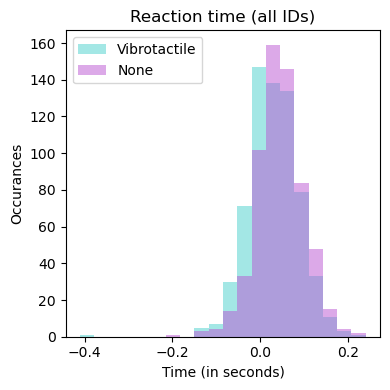

In [31]:
bins = np.histogram(np.hstack((threshold_distance_timestamp_haptics_nan, threshold_distance_timestamp_wo_nan)), bins=20)[1]

plt.figure(figsize=(4,4))
plt.hist(threshold_distance_timestamp_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
plt.hist(threshold_distance_timestamp_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')
plt.title('Reaction time (all IDs)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Occurances')
plt.legend()
plt.tight_layout()
plt.savefig('reactiontime_hist.png', dpi=500, bbox_inches="tight")
plt.show()

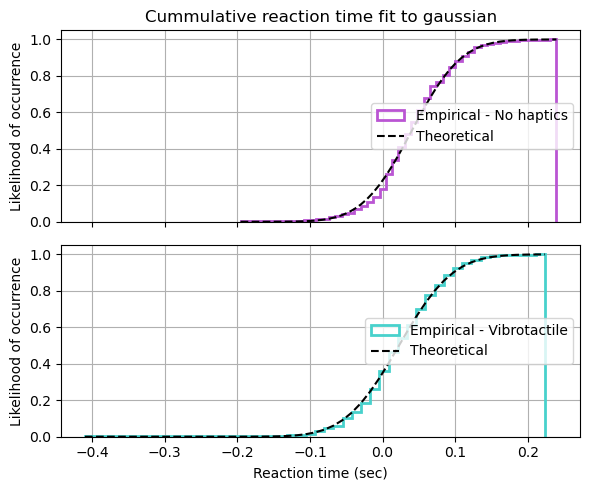

In [32]:
mu_wo = np.mean(threshold_distance_timestamp_wo_nan)
sigma_wo = np.std(threshold_distance_timestamp_wo_nan)
n_bins_wo = 50

fig, ax = plt.subplots(2, figsize=(6, 5), sharex=True, sharey=True)

# plot the cumulative histogram
n_wo, bins_wo, patches_wo = ax[0].hist(threshold_distance_timestamp_wo_nan, n_bins_wo, density=1, histtype='step',
                           cumulative=True, label='Empirical - No haptics', color='mediumorchid', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_wo, mu_wo, sigma_wo).cumsum()
y /= y[-1]

ax[0].plot(bins_wo, y, 'k--', linewidth=1.5, label='Theoretical')


ax[0].grid(True)
ax[0].legend(loc='right')
ax[0].set_title('Cummulative reaction time fit to gaussian')
ax[0].set_ylabel('Likelihood of occurrence')



## Haptics
mu_haptics = np.mean(threshold_distance_timestamp_haptics_nan)
sigma_haptics = np.std(threshold_distance_timestamp_haptics_nan)
n_bins_haptics = 50

# plot the cumulative histogram
n_haptics, bins_haptics, patches_haptics = ax[1].hist(threshold_distance_timestamp_haptics_nan, n_bins_haptics, density=1, histtype='step',
                           cumulative=True, label='Empirical - Vibrotactile', color='mediumturquoise', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_haptics, mu_haptics, sigma_haptics).cumsum()
y /= y[-1]

ax[1].plot(bins_haptics, y, 'k--', linewidth=1.5, label='Theoretical')


ax[1].grid(True)
ax[1].legend(loc='right')
ax[1].set_xlabel('Reaction time (sec)')
ax[1].set_ylabel('Likelihood of occurrence')

plt.tight_layout()

plt.show()

In [47]:
repitions = gui_reps_haptics
# print("repitions:", repitions)
correct_timestamp_haptics = correct_timestamp_haptics[:-1]
level = np.arange(len(correct_timestamp_haptics))//repitions
# print('Levels:', level)




performance_haptics = np.bincount(level,correct_timestamp_haptics)/np.bincount(level)
print('performance per level:', performance_haptics)
np.savetxt('dailyn_haptics.txt', performance_haptics)
np.savetxt('dailyn_ID_haptics.txt', ID_haptics)

performance per level: [0.84      0.8       1.        0.88      0.96      0.8       0.4
 0.52      0.4       0.84      0.76      0.72      0.28      0.44
 0.48      0.76      0.64      0.68      0.88      0.88      0.8
 0.44      0.28      0.32      0.76      0.84      0.7826087]


In [46]:

repitions = gui_reps_wo
# print("repitions:", repitions)
correct_timestamp_wo = correct_timestamp_wo[:-1]
level = np.arange(len(correct_timestamp_wo))//repitions
# print('Levels:', level)




performance_wo = np.bincount(level,correct_timestamp_wo)/np.bincount(level)
print('performance per level:', performance_wo)
np.savetxt('dailyn_wo.txt', performance_wo)
np.savetxt('dailyn_ID_wo.txt', ID_wo)

performance per level: [0.96       0.8        0.96       0.84       0.88       0.76
 0.68       0.56       0.52       0.88       0.8        0.6
 0.68       0.68       0.6        0.68       0.72       0.6
 0.84       0.84       0.8        0.44       0.72       0.44
 0.72       0.6        0.73913043]


In [35]:
# performance_wo = performance_wo[:-1]

In [36]:
np.shape(ID_wo)

(27,)

In [37]:
1-performance_haptics

array([0.16, 0.2 , 0.  , 0.12, 0.04, 0.2 , 0.6 , 0.48, 0.6 , 0.16, 0.24,
       0.28, 0.72, 0.56, 0.52, 0.24, 0.36, 0.32, 0.12, 0.12, 0.2 , 0.56,
       0.72, 0.68, 0.24, 0.16, 0.28])

0.7788805350278246
0.6295969577601943


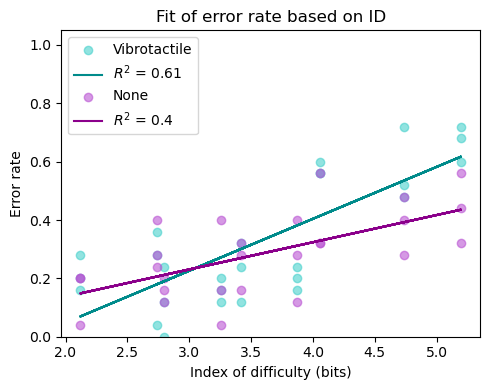

In [38]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_dailyn.png', dpi=500, bbox_inches="tight")
plt.show()

In [39]:
start_cue_haptics

array([  12225,   16230,   20233,   24270,   28216,   32254,   36278,
         40260,   44211,   48247,   52274,   56237,   60268,   64238,
         68229,   72259,   76227,   80251,   84216,   88243,   92278,
         96225,  100249,  104232,  108253,  121066,  129849,  138648,
        147423,  156249,  165056,  173820,  182650,  191441,  202646,
        211417,  220210,  229065,  237854,  246654,  255416,  264240,
        273081,  281810,  290673,  299477,  308253,  317076,  325842,
        334614,  348680,  355063,  361456,  367863,  374221,  380650,
        387010,  393445,  399860,  406279,  412677,  419028,  425461,
        431821,  441451,  447844,  454246,  460652,  467058,  473482,
        479822,  486213,  492629,  499028,  505436,  562408,  568765,
        575189,  581607,  587959,  594373,  600801,  607179,  613580,
        620003,  626364,  632805,  639171,  645559,  652008,  658360,
        664766,  671185,  677569,  683995,  690434,  696776,  703158,
        709571,  716

In [40]:
stop_cue_haptics

array([  13147,   17156,   21165,   25193,   29151,   33189,   37134,
         41191,   45148,   49186,   53134,   57166,   61128,   65180,
         69158,   73193,   77151,   81181,   85138,   89167,   93128,
         97147,  101188,  105164,  109180,  121997,  130776,  139575,
        148359,  157178,  165994,  174754,  183575,  192374,  203577,
        212345,  221145,  229993,  238786,  247589,  256337,  265174,
        274003,  282737,  291602,  300334,  309176,  318004,  326771,
        335540,  349540,  355987,  362377,  368791,  375143,  381575,
        388008,  394366,  400784,  407197,  413605,  419951,  426391,
        432749,  442369,  448766,  455182,  461584,  467985,  474330,
        480742,  487140,  493551,  499953,  506367,  562959,  569377,
        575803,  582224,  588579,  594992,  601413,  607800,  614193,
        620621,  626979,  633424,  639784,  646171,  652625,  658977,
        665379,  671800,  678181,  684612,  690972,  697396,  703773,
        710194,  716

In [41]:
threshold_crossings_up_haptics

array([  12518,   16582,   20481,   24475,   28719,   32510,   36325,
         40269,   43965,   48277,   52399,   56335,   60465,   64149,
         67969,   72152,   76242,   80627,   84795,   88564,   92693,
         96581,  100675,  104235,  108253,  120877,  130176,  139206,
        147903,  156693,  165059,  173787,  182866,  191623,  202728,
        211295,  220166,  229395,  238134,  246682,  255158,  264523,
        273037,  281891,  290911,  299797,  308572,  326058,  334597,
        348600,  354736,  361769,  368094,  374754,  380722,  386984,
        393626,  400130,  406668,  412705,  419006,  425861,  431786,
        438757,  441817,  448241,  454346,  460923,  467263,  473477,
        479920,  486586,  493537,  498976,  506180,  515959,  562589,
        568947,  575359,  581977,  588300,  594378,  600364,  606920,
        613756,  620182,  626788,  632724,  639260,  645522,  652193,
        658500,  664929,  671241,  677436,  684401,  690634,  697156,
        703626,  709

In [42]:
# Exclude the first pulse - that is ardunio power cycling
threshold_crossings_up_haptics = findThresholdCrossing(process_haptics.lpFilteredData, mvc_threshold)
threshold_crossings_up_wo = findThresholdCrossing(process_wo.lpFilteredData, mvc_threshold)

threshold_closest_haptics = np.empty(np.size(start_cue_haptics[:]))
threshold_closest_haptics[:] = np.nan
correct = np.empty(np.size(start_cue_haptics[:]))
###for every value in the strt_cue 
for idx_cue, cue in enumerate(start_cue_haptics[:]):

    after_start = start_cue_haptics[idx_cue] <= threshold_crossings_up_haptics
    before_stop = threshold_crossings_up_haptics <= stop_cue_haptics[idx_cue]
    # check if there is a value between start_cue and stop cue
    if np.any(np.logical_and(after_start, before_stop)):
        in_target = np.argwhere(np.logical_and(after_start, before_stop))
        # print(in_target)
        closet_value = in_target[0]
        # print(closet_value)
        threshold_closest_haptics[idx_cue] = threshold_crossings_up_haptics[in_target[0]]
        # print(threshold_closest_haptics[in_target[0]])
        correct[idx_cue] = True
    else:
        # if not - get closet 
        idx = (np.abs(threshold_crossings_up_haptics - start_cue_haptics[idx_cue])).argmin()

        threshold_closest_haptics[idx_cue] = threshold_crossings_up_haptics[idx]
        correct[idx_cue] = False
         # get rid of values greater than half the distance between the next cue 

print("closest:", threshold_closest_haptics)
print("correctness:", correct)

threshold_distance_haptics = threshold_closest_haptics - start_cue_haptics
# print("distance away:", threshold_distance_haptics)


threshold_distance_haptics[threshold_distance_haptics > 4000] = NaN
threshold_distance_haptics[threshold_distance_haptics < -4000] = NaN
print("distance away:", threshold_distance_haptics)

closest: [  12518.   16582.   20481.   24475.   28719.   32510.   36325.   40269.
   43965.   48277.   52399.   56335.   60465.   64149.   67969.   72152.
   76242.   80627.   84795.   88564.   92693.   96581.  100675.  104235.
  108253.  120877.  130176.  139206.  147903.  156693.  165059.  173787.
  182866.  191623.  202728.  211295.  220166.  229395.  238134.  246682.
  255158.  264523.  273037.  281891.  290911.  299797.  308572.  308572.
  326058.  334597.  348600.  354736.  361769.  368094.  374754.  380722.
  386984.  393626.  400130.  406668.  412705.  419006.  425861.  431786.
  441817.  448241.  454346.  460923.  467263.  473477.  479920.  486586.
  493537.  498976.  506180.  562589.  568947.  575359.  581977.  588300.
  594378.  600364.  606920.  613756.  620182.  626788.  632724.  639260.
  645522.  652193.  658500.  664929.  671241.  677436.  684401.  690634.
  697156.  703626.  709948.  716342.  737229.  741422.  745190.  749124.
  753289.  757324.  761252.  765284.  7694

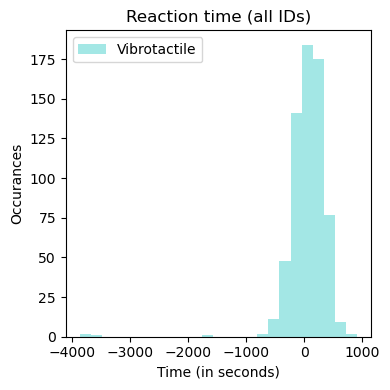

In [43]:
plt.figure(figsize=(4,4))
plt.hist(threshold_distance_haptics, bins=25, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
# plt.hist(threshold_distance_timestamp_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')
plt.title('Reaction time (all IDs)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Occurances')
plt.legend()
plt.tight_layout()
# plt.savefig('reactiontime_hist.png', dpi=500, bbox_inches="tight")
plt.show()